# **Environment Preparation**

In [ ]:
#Install required packages

! pip install nni # install nni
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip # download ngrok and unzip it
! unzip ngrok-stable-linux-amd64.zip
! mkdir -p nni_repo
! git clone https://github.com/microsoft/nni.git nni_repo/nni # clone NNI's offical repo to get examples

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-02 01:30:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  2.40MB/s    in 12s     

2022-12-02 01:30:54 (1.09 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   
fatal: destination path 'nni_repo/nni' already exists and is not an empty directory.


In [ ]:
#Set the ngrok authtoken

! ./ngrok authtoken 2GxcvHX1gQK9yaDRPYbwSxTOUk0_63WnGFovf5qhS3FooWdCb

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
#Mount Google Drive

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Pull kaggle.json from Drive

from google.colab import files

! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Download the kaggle dataset into the environment

! kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery
! unzip semantic-segmentation-of-aerial-imagery.zip

semantic-segmentation-of-aerial-imagery.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  semantic-segmentation-of-aerial-imagery.zip
replace Semantic segmentation dataset/Tile 1/images/image_part_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inf

In [ ]:
#Install required libraries and versions

! pip install patchify
! pip install segmentation_models
! pip install tensorflow==2.7.0.
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Required to compile and run model

import segmentation_models as sm
import tensorflow as tf

sm.set_framework('tf.keras')

Segmentation Models: using `keras` framework.


In [ ]:
#Import the unet model python file path from Google Drive

import sys
import os

py_file_location = "/content/drive/My Drive/Fall_2022/CS301_F22/Project/"
sys.path.append(os.path.abspath(py_file_location))

# **Run the Segmentation**

Semantic segmentation dataset/
Semantic segmentation dataset/Tile 4
Semantic segmentation dataset/Tile 4/images
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_002.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_004.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_008.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_001.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_007.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_003.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_005.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_009.jpg
Now patchifying image: Semantic segmentation dataset/Tile 4/images/image_part_006.jpg
Semantic segmentation dataset/Tile 4/masks
Semantic segmentation dataset/Tile 6
Semantic segmentation dataset/Tile

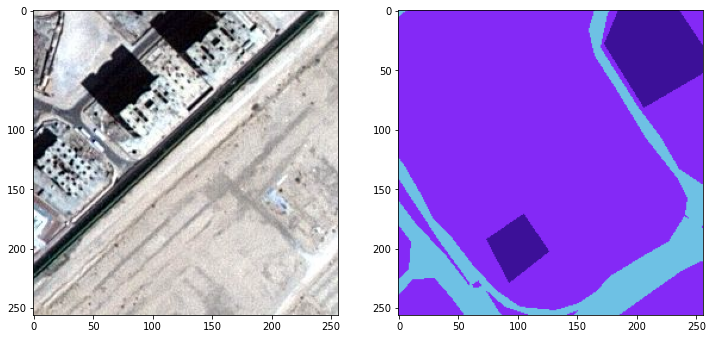

60
Unique labels in label dataset are:  [0 1 2 3 4 5]


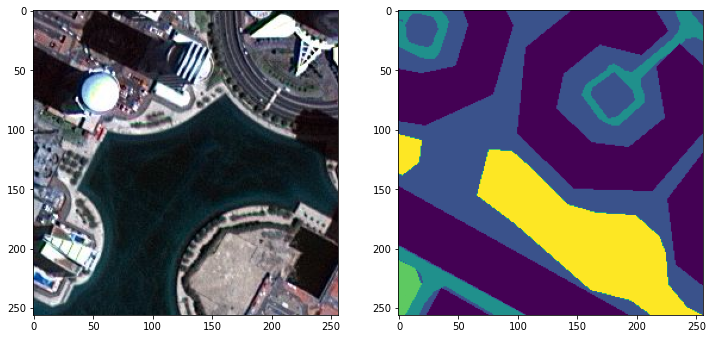

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

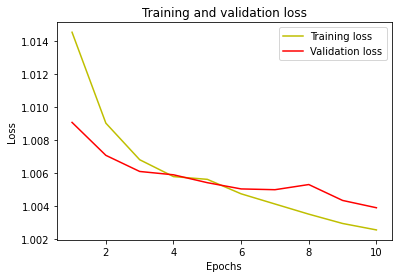

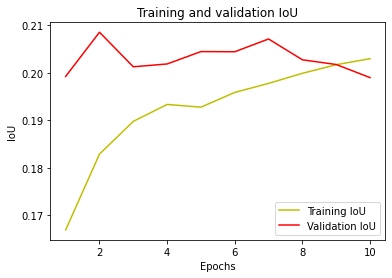

Mean IoU = 0.12536936


In [ ]:
# https://youtu.be/jvZm8REF2KY
"""
Explanation of using RGB masks: https://youtu.be/sGAwx4GMe4E

https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery

The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

Use patchify....
Tile 1: 797 x 644 --> 768 x 512 --> 6
Tile 2: 509 x 544 --> 512 x 256 --> 2
Tile 3: 682 x 658 --> 512 x 512  --> 4
Tile 4: 1099 x 846 --> 1024 x 768 --> 12
Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
Tile 6: 859 x 838 --> 768 x 768 --> 9
Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
Total 9 images in each folder * (145 patches) = 1305
Total 1305 patches of size 256x256
"""

import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

root_directory = 'Semantic segmentation dataset/'

patch_size = 256

#Read images from repsective 'images' subdirectory
#As all images are of ddifferent size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3. 
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
               
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. 
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                        image_dataset.append(single_patch_img)           

                
  
#Now do the same as above for masks
#For this specific dataset we could have added masks to the above code as masks have extension png
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
               
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask)  

image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

###########################################################################
"""
RGB to HEX: (Hexadecimel --> base 16)
This number divided by sixteen (integer division; ignoring any remainder) gives 
the first hexadecimal digit (between 0 and F, where the letters A to F represent 
the numbers 10 to 15). The remainder gives the second hexadecimal digit. 
0-9 --> 0-9
10-15 --> A-F

Example: RGB --> R=201, G=, B=

R = 201/16 = 12 with remainder of 9. So hex code for R is C9 (remember C=12)

Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152

"""
#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60. 
print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

label = single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

############################################################################

n_classes = len(np.unique(labels))
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

#######################################
#Parameters for model
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss
# from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight('balanced', np.unique(np.ravel(labels,order='C')), 
#                               np.ravel(labels,order='C'))
# print(weights)

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

#MODEL COMPRESSION: CREATE THE TEACHER MODEL AND RUN HERE

from simple_multi_unet_model_compression import multi_unet_model_teacher, jacard_coef  

metrics=['accuracy', jacard_coef]

def get_model_teacher():
    return multi_unet_model_teacher(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model_teacher()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()

history_teacher = model.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

#Minmaxscaler
#With weights...[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]   in Dice loss
#With focal loss only, after 100 epochs val jacard is: 0.62  (Mean IoU: 0.6)            
#With dice loss only, after 100 epochs val jacard is: 0.74 (Reached 0.7 in 40 epochs)
#With dice + 5 focal, after 100 epochs val jacard is: 0.711 (Mean IoU: 0.611)
##With dice + 1 focal, after 100 epochs val jacard is: 0.75 (Mean IoU: 0.62)
#Using categorical crossentropy as loss: 0.71

##With calculated weights in Dice loss.    
#With dice loss only, after 100 epochs val jacard is: 0.672 (0.52 iou)

##Standardscaler 
#Using categorical crossentropy as loss: 0.677

model.save('models/satellite_standard_unet_100epochs.hdf5')
############################################################
#TRY ANOTHE MODEL - WITH PRETRINED WEIGHTS
#Resnet backbone
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# preprocess input
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)

# define model
model_resnet_backbone = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

# compile keras model with defined optimozer, loss and metrics
#model_resnet_backbone.compile(optimizer='adam', loss=focal_loss, metrics=metrics)
"""
model_resnet_backbone.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
                              loss='categorical_crossentropy', metrics=metrics)

print(model_resnet_backbone.summary())

history2=model_resnet_backbone.fit(X_train_prepr, 
          y_train,
          batch_size=16, 
          epochs=10,
          verbose=1,
          validation_data=(X_test_prepr, y_test))
"""

#Minmaxscaler
#With weights...[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]   in Dice loss
#With focal loss only, after 100 epochs val jacard is:               
#With dice + 5 focal, after 100 epochs val jacard is: 0.73 (reached 0.71 in 40 epochs. So faster training but not better result. )
##With dice + 1 focal, after 100 epochs val jacard is:   
    ##Using categorical crossentropy as loss: 0.755 (100 epochs)
#With calc. weights supplied to model.fit: 
 
#Standard scaler
#Using categorical crossentropy as loss: 0.74

###########################################################
#plot the training and validation accuracy and loss at each epoch
history = history_teacher
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
"""
#Save the model for future usage

model.save('drive/My Drive/Fall_2022/CS301_F22/Project/Saved_Model/model.h5')
"""

"\n#Save the model for future usage\n\nmodel.save('drive/My Drive/Fall_2022/CS301_F22/Project/Saved_Model/model.h5')\n"

In [ ]:
"""
#Load the model from drive

model = tf.keras.models.load_model('drive/My Drive/Fall_2022/CS301_F22/Project/Saved_Model/model.h5', compile=False)
model.summary()
"""

"\n#Load the model from drive\n\nmodel = tf.keras.models.load_model('drive/My Drive/Fall_2022/CS301_F22/Project/Saved_Model/model.h5', compile=False)\nmodel.summary()\n"

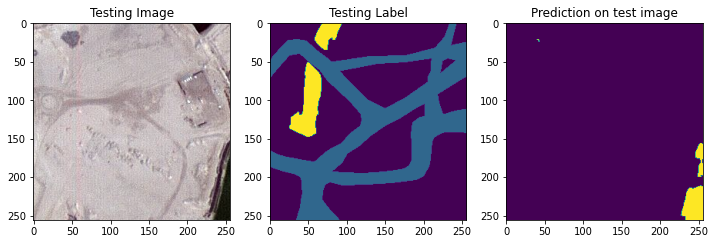

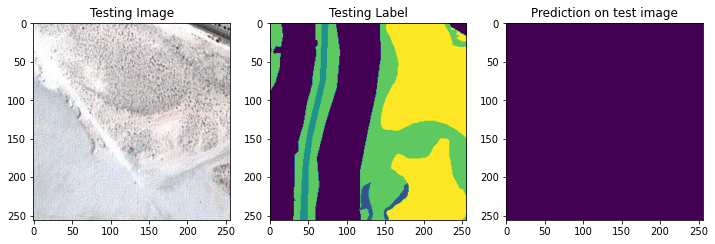

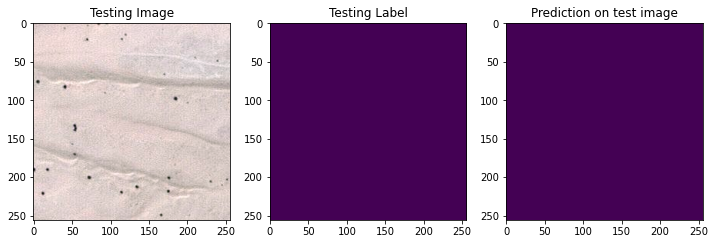

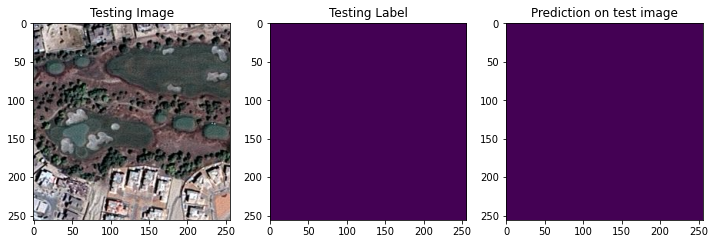

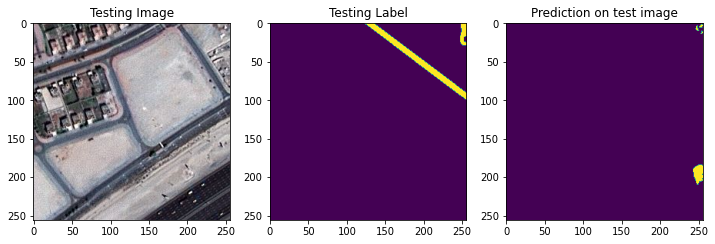

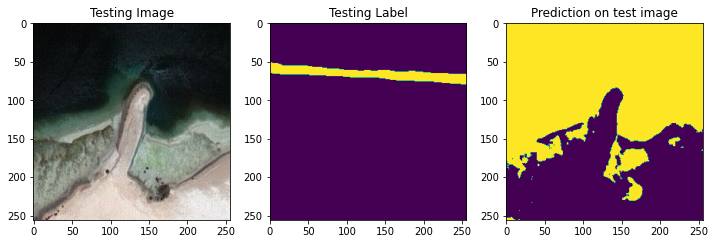

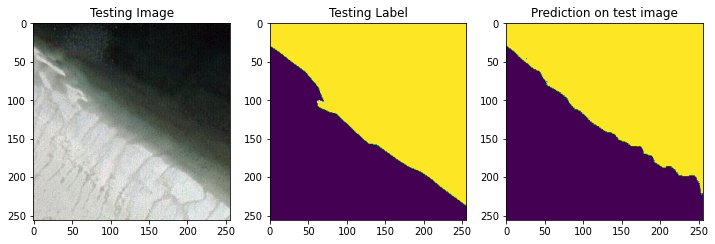

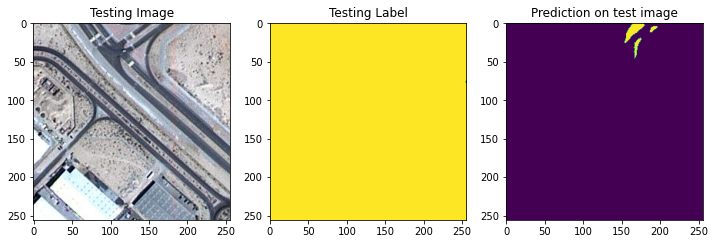

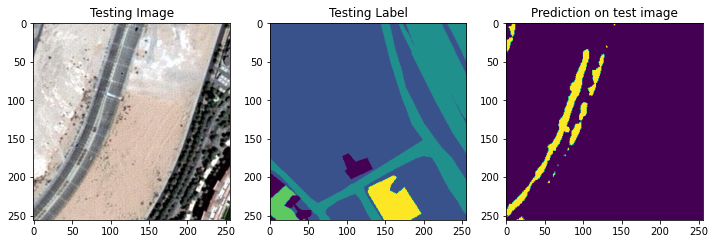

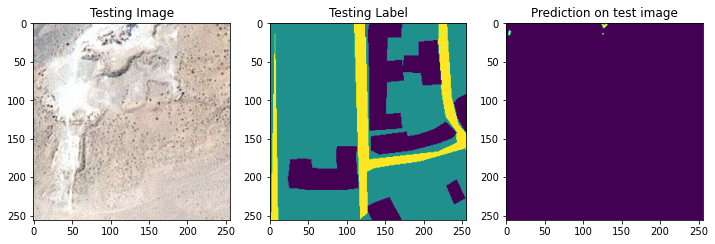

In [ ]:
#Predictions on 10 random images

import random
for i in range(0,10):
  test_img_number = random.randint(0, len(X_test))
  test_img = X_test[test_img_number]
  ground_truth=y_test_argmax[test_img_number]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

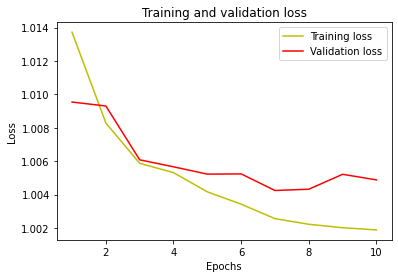

In [ ]:
#Training and Validation Loss Graph

history = history_teacher
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Calculate and print confusion matrix

from sklearn.metrics import confusion_matrix
predictions = np.array(y_pred_argmax)
predictions = np.stack(predictions, axis=1).flatten()
true_labels = np.array(y_test_argmax)
true_labels = np.stack(true_labels, axis=1).flatten()
pred_list = predictions.tolist()
true_list = true_labels.tolist()
labels_list = np.unique(labels).tolist()
cm = confusion_matrix(true_list, pred_list, labels=labels_list)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[   2355 2231358       0       0   43094       0]
 [   4950 8845036       0       0  657980       0]
 [   2070 1495017       0       0  100010       0]
 [    942 1358406       0       0  357208       0]
 [    162 1283761       0       0  586211       0]
 [     19  124484       0       0   11833       0]]


In [ ]:
#Calculate precision and recall values

from sklearn.metrics import precision_score, recall_score, average_precision_score

precision = precision_score(true_list, pred_list, average='weighted')
recall = recall_score(true_list, pred_list, average='weighted')
print(precision)
print(recall)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38690248592517906
0.5515147242052801


In [ ]:
#Print classification report for all classes

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(true_list, pred_list, target_names=['Building', 'Land', 'Road', 'Vegetation', 'Water', 'Unlabeled']))


Classification Report



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Building       0.22      0.00      0.00   2276807
        Land       0.58      0.93      0.71   9507966
        Road       0.00      0.00      0.00   1597097
  Vegetation       0.00      0.00      0.00   1716556
       Water       0.33      0.31      0.32   1870134
   Unlabeled       0.00      0.00      0.00    136336

    accuracy                           0.55  17104896
   macro avg       0.19      0.21      0.17  17104896
weighted avg       0.39      0.55      0.43  17104896



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


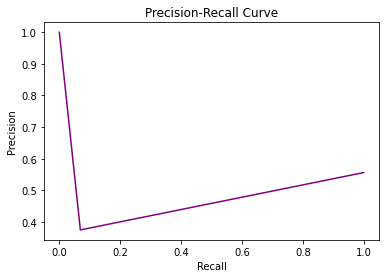

In [ ]:
#Plot precision-recall curve

from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve

precision2, recall2, thresholds = precision_recall_curve(true_list, pred_list, pos_label=1)
fig, ax = plt.subplots()
ax.plot(recall2, precision2, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

# **Hyperparameter Optimization**

GP tuner is a Bayesian Optimization method where Gaussian Process is used for modeling loss functions.

Bayesian optimization works by constructing a posterior distribution of functions (a Gaussian Process) that best describes the function you want to optimize. As the number of observations grows, the posterior distribution improves, and the algorithm becomes more certain of which regions in parameter space are worth exploring and which are not.

GP tuner is designed to minimize/maximize the number of steps required to find a combination of parameters that are close to the optimal combination. To do so, this method uses a proxy optimization problem (finding the maximum of the acquisition function) that, albeit still a hard problem, is cheaper (in the computational sense) to solve, and it’s amenable to common tools. Therefore, Bayesian Optimization is suggested for situations where sampling the function to be optimized is very expensive.

Note that the only acceptable types in the search space are randint, uniform, quniform, loguniform, qloguniform, and numerical choice.

**Prepare the Model**

In [ ]:
#Import the file used by nni to run the optimization from Google Drive

import shutil

shutil.copy("drive/MyDrive/Fall_2022/CS301_F22/Project/semantic_segmentation/nnipython.py", "/content/nnipython.py")

'/content/nnipython.py'

**Defining Search Space for GP**

Note that the only acceptable types in the search space are randint, uniform, quniform, loguniform, qloguniform, and numerical choice.

In [ ]:
#The search space defines the hyperparameters to optimize

#learning rate of 0.01 or 0.1 too high, results in model getting stuck

search_space = {
    "batch_size": {"_type":"choice", "_value": [4, 8, 16, 32, 64]},
    "epochs": {"_type":"choice", "_value": [10, 25, 50, 75, 100]},
    "learning_rate": {"_type":"choice", "_value": [0.00001, 0.0001, 
                                                   0.001]}
}

**Configure the Experiment**

In [ ]:
#Create a new experiment

from nni.experiment import Experiment
experiment = Experiment('local')

**Configure Trial Code**

In NNI evaluation of each hyperparameter set is called a trial. So the model script is called trial code.

In [ ]:
#Configure the settings of the new experiment

experiment.config.trial_command = 'python nnipython.py'
experiment.config.trial_code_directory = '.'
experiment.config.search_space = search_space
experiment.config.tuner.name = 'GPTuner'
experiment.config.tuner.class_args['optimize_mode'] = 'maximize'
experiment.config.max_trial_number = 10
experiment.config.trial_concurrency = 1

**Run the Experiment**

In [ ]:
#Experiment starts on port 5000

experiment.run(5000)

[2022-11-19 21:14:46] Creating experiment, Experiment ID: nslye5w6


INFO:nni.experiment:Creating experiment, Experiment ID: ${CYAN}nslye5w6


[2022-11-19 21:14:46] Starting web server...


INFO:nni.experiment:Starting web server...


[2022-11-19 21:14:47] Setting up...


INFO:nni.experiment:Setting up...


[2022-11-19 21:14:47] Web portal URLs: http://127.0.0.1:5000 http://172.28.0.2:5000


INFO:nni.experiment:Web portal URLs: ${CYAN}http://127.0.0.1:5000 http://172.28.0.2:5000


[2022-11-19 21:14:49] WARNING: KeyboardInterrupt detected


[2022-11-19 21:14:49] Stopping experiment, please wait...


INFO:nni.experiment:Stopping experiment, please wait...


[2022-11-19 21:14:49] Experiment stopped


INFO:nni.experiment:Experiment stopped


In [ ]:
get_ipython().system_raw('./ngrok http 5000 &')

In [ ]:
#Generate the NNI Web UI link

! curl -s http://localhost:4040/api/tunnels # don't change the port number 4040

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://47b4-34-126-95-31.ngrok.io","proto":"https","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://47b4-34-126-95-31.ngrok.io","proto":"http","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [ ]:
#Used to kill any experiments currently running

! nnictl stop --all

INFO:  Stopping experiment nslye5w6
INFO:  Stop experiment success.


# **Model Compression**

Reference: https://keras.io/examples/vision/knowledge_distillation/

In [ ]:
#Distiller class to perform the Knowledge Distallation

from tensorflow import keras

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [ ]:
#MODEL COMPRESSION: CREATE THE STUDENT MODEL

from simple_multi_unet_model_compression import multi_unet_model_student

metrics=['accuracy', jacard_coef]

def get_model_student():
    return multi_unet_model_student(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model_student = get_model_student()
model_student.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=total_loss, metrics=metrics)
model_student.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_133 (Conv2D)            (None, 256, 256, 8)  224         ['input_8[0][0]']                
                                                                                                  
 dropout_63 (Dropout)           (None, 256, 256, 8)  0           ['conv2d_133[0][0]']             
                                                                                                  
 conv2d_134 (Conv2D)            (None, 256, 256, 8)  584         ['dropout_63[0][0]']       

In [ ]:
# Initialize and compile distiller
distiller = Distiller(student=model_student, teacher=model)
distiller.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
    student_loss_fn=total_loss,
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
history_student = distiller.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=1, 
                    epochs=3, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

# Evaluate student on test dataset
distiller.evaluate(X_test, y_test)

Epoch 1/3
131/131 [==============================] - 14s 89ms/step - accuracy: 0.5294 - jacard_coef: 0.1875 - student_loss: 1.0057 - distillation_loss: 1.6505e-05 - val_accuracy: 0.5578 - val_jacard_coef: 0.1971 - val_student_loss: 1.0079
Epoch 2/3
131/131 [==============================] - 11s 85ms/step - accuracy: 0.5346 - jacard_coef: 0.1896 - student_loss: 1.0055 - distillation_loss: 1.6519e-05 - val_accuracy: 0.5562 - val_jacard_coef: 0.1983 - val_student_loss: 1.0074
Epoch 3/3
9/9 [==============================] - 1s 56ms/step - accuracy: 0.5534 - jacard_coef: 0.1979 - student_loss: 1.0056


[0.553366482257843, 0.19785507023334503, 1.006775975227356]

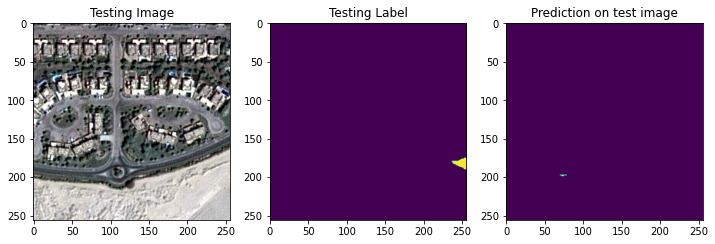

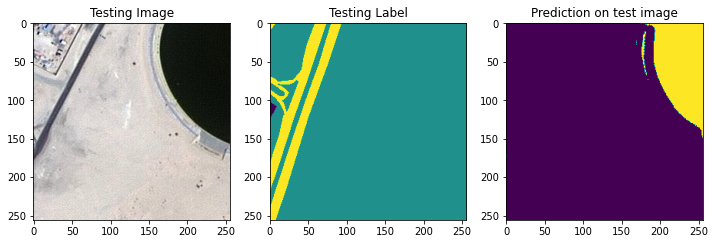

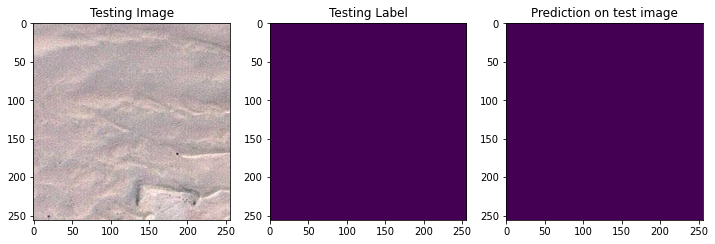

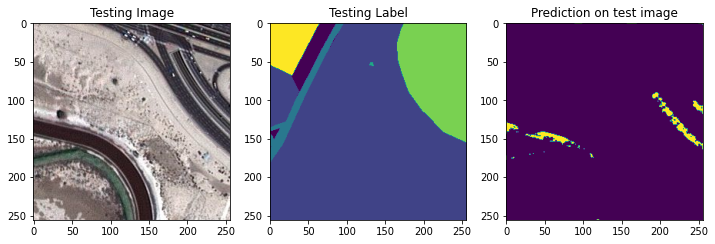

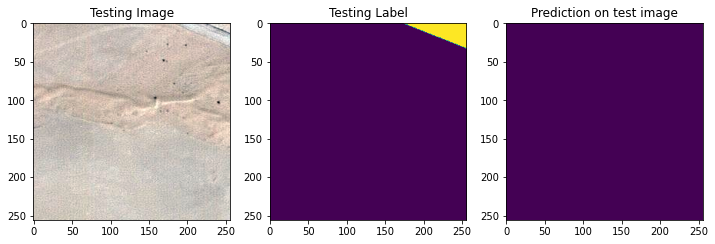

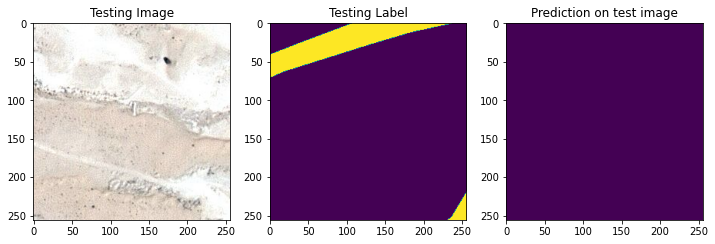

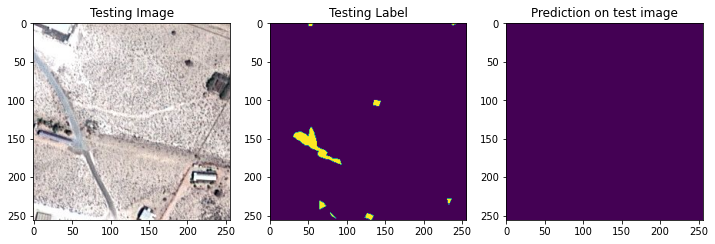

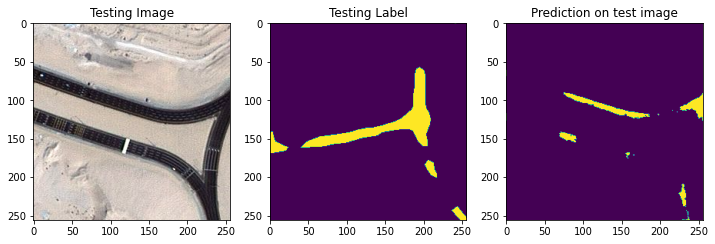

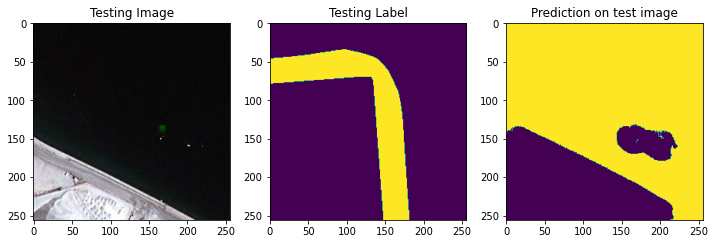

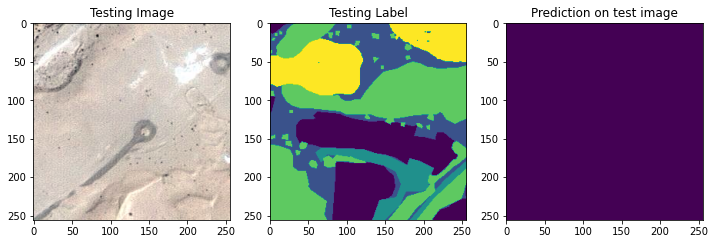

In [ ]:
#Predictions on 10 random images

import random
for i in range(0,10):
  test_img_number = random.randint(0, len(X_test))
  test_img = X_test[test_img_number]
  ground_truth=y_test_argmax[test_img_number]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model_student.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

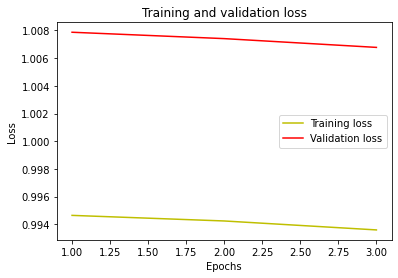

In [ ]:
#Training and Validation Loss Graph

history = history_student
loss = history.history['student_loss']
val_loss = history.history['val_student_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Calculate and print confusion matrix

from sklearn.metrics import confusion_matrix
predictions = np.array(y_pred_argmax)
predictions = np.stack(predictions, axis=1).flatten()
true_labels = np.array(y_test_argmax)
true_labels = np.stack(true_labels, axis=1).flatten()
pred_list = predictions.tolist()
true_list = true_labels.tolist()
labels_list = np.unique(labels).tolist()
cm = confusion_matrix(true_list, pred_list, labels=labels_list)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[      0 2252638       0       0   24169       0]
 [      0 8951967       0       0  555999       0]
 [      0 1514947       0       0   82150       0]
 [      0 1380168       0       0  336388       0]
 [      0 1306560       0       0  563574       0]
 [      0  127398       0       0    8938       0]]


In [ ]:
#Calculate precision and recall values

from sklearn.metrics import precision_score, recall_score, average_precision_score

precision_student = precision_score(true_list, pred_list, average='weighted')
recall_student = recall_score(true_list, pred_list, average='weighted')
print(precision_student)
print(recall_student)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.35955645230911076
0.556305107029005


In [ ]:
#Print classification report for all classes

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(true_list, pred_list, target_names=['Building', 'Land', 'Road', 'Vegetation', 'Water', 'Unlabeled']))


Classification Report



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Building       0.00      0.00      0.00   2276807
        Land       0.58      0.94      0.71   9507966
        Road       0.00      0.00      0.00   1597097
  Vegetation       0.00      0.00      0.00   1716556
       Water       0.36      0.30      0.33   1870134
   Unlabeled       0.00      0.00      0.00    136336

    accuracy                           0.56  17104896
   macro avg       0.16      0.21      0.17  17104896
weighted avg       0.36      0.56      0.43  17104896



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


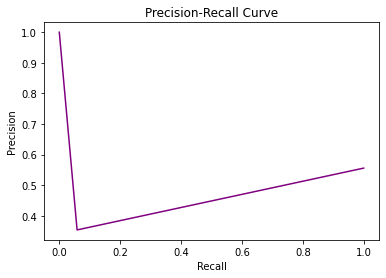

In [ ]:
#Plot precision-recall curve

from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve

precision_student2, recall_student2, thresholds = precision_recall_curve(true_list, pred_list, pos_label=1)
fig, ax = plt.subplots()
ax.plot(recall_student2, precision_student2, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()